In [29]:
""" SECTION 1: IMPORTS """

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [30]:
""" SECTiOIN 2: LOAD DATA AND DATALOADER """

# 1. Load and Prepare the MNIST Dataset
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,))])  # MNIST mean and std

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [31]:
# 2. Define the Neural Network Architecture
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Flatten the 28x28 images
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # 10 classes for digits 0-9

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the images
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [32]:
# 3. Initialize the Network and Optimizer
model = MNISTNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

MNISTNet(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [34]:
# 4. Training the Network
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % 100 == 0:
            print(f"Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)} ({100. * batch_idx / len(train_loader):.0f}%)]\tLoss: {loss.item():.6f}")

In [35]:
# 5. Evaluating the Network
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    print(f'\nTest set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(test_loader.dataset)} ({100. * correct / len(test_loader.dataset):.0f}%)\n')

In [36]:
for epoch in range(1, 10):
    train(model, device, train_loader, optimizer, epoch)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.328241
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.415361
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.257078
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.219790
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.306726
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.173535
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.046654
Train Epoch: 1 [44800/60000 (75%)]	Loss: 0.107991
Train Epoch: 1 [51200/60000 (85%)]	Loss: 0.280376
Train Epoch: 1 [57600/60000 (96%)]	Loss: 0.082336
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.105903
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.176897
Train Epoch: 2 [12800/60000 (21%)]	Loss: 0.166401
Train Epoch: 2 [19200/60000 (32%)]	Loss: 0.046913
Train Epoch: 2 [25600/60000 (43%)]	Loss: 0.130336
Train Epoch: 2 [32000/60000 (53%)]	Loss: 0.029786
Train Epoch: 2 [38400/60000 (64%)]	Loss: 0.179425
Train Epoch: 2 [44800/60000 (75%)]	Loss: 0.066214
Train Epoch: 2 [51200/60000 (85%)]	Loss: 0.126389
Train Epoch: 2 [57600/60000 (96%)]	Loss: 0.117389
Train Epoch:

In [37]:
test(model, device, test_loader)


Test set: Average loss: 0.0001, Accuracy: 9725/10000 (97%)



In [38]:
def predict_and_display(model, device, data_loader, index=0):
    model.eval()
    with torch.no_grad():
        data, target = next(iter(data_loader))
        img, label = data[index], target[index]
        img = img.to(device)

        # Display the image
        plt.imshow(img.cpu().squeeze(), cmap='gray')
        plt.title(f'Actual Label: {label}')
        plt.show()

        # Model prediction
        output = model(img.unsqueeze(0))
        pred = output.argmax(dim=1, keepdim=True)
        print(f'Predicted Label: {pred.item()}')

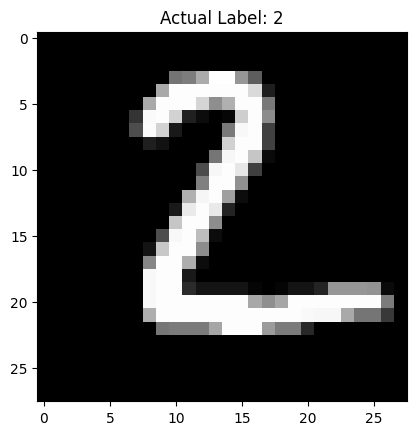

Predicted Label: 2


In [39]:
predict_and_display(model, device, test_loader, index=1)